In [1]:
import os
import numpy as np
import pandas as pd
import mne
from mne.decoding import SPoC
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,corrmap)
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from mne.time_frequency import psd_multitaper, tfr_multitaper, tfr_morlet
import warnings
from sklearn.model_selection import ShuffleSplit
from mne.preprocessing import Xdawn
from operator import itemgetter
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_predict
from mne.decoding import CSP, cross_val_multiscore
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from Channel_Selector import order_channels
from Start_And_Finish_Markers import Start_And_Finish_Markers
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace

In [2]:
# Load a sample of the folder 
#(fdt files are detected and read automatically when .set is inferenced)
sample_data_raw_file = '3TM_01-100.set'
raw = mne.io.read_raw_eeglab(sample_data_raw_file)

Reading C:\Users\thoma\Desktop\MSc - Research Project\PRE_ICA_new_analyses\3TM_01-100.fdt


In [3]:
EO = raw.copy().pick_channels(['F4', 'AF4', 'FC4', 'F2', 'F6', 'FC2', 'FC6', 'FZ', 'FCZ', 'PO4', 'POZ', 'O2', 'PO8', 'OZ', 'PO3', 'O1', 'PO7', 'T8'])

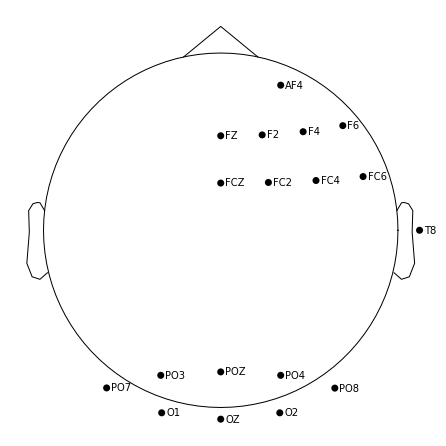

In [4]:
EO.plot_sensors(title="Eyes Open / Eyes Closed ROIs", show_names=True)
print("")

In [5]:
WW = raw.copy().pick_channels(['AF8', 'AF7', 'FP2', 'FP1', 'O2', 'OZ', 'O1', 'PO8', 'PO6', 'FT8', 'P7', 'PO7', 'FT7', 'P5', 'TP7', 'T8', 'C5', 'P8', 'F5'])

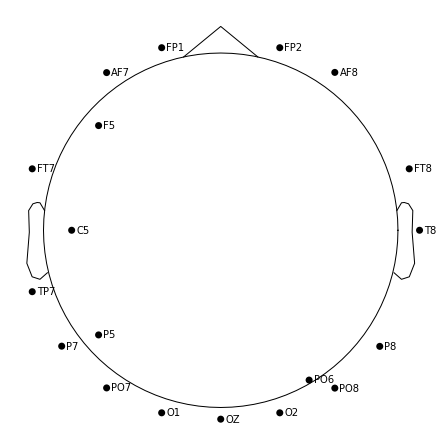

In [6]:
WW.plot_sensors(title="Warm Water / Hot Water ROIs", show_names=True)
print("")